*****Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis*****

**Problem Statement**:In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

**Objective**: We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

**Research Question** :Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings 
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\Sejal's Work\SEJAL\EXcel\yellow_tripdata_2020-01.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [7]:
df.shape

(6405008, 18)

In [9]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [11]:
#Calculating duration from the pickup and dropoff datetime in minutes

# Converting datatype Object into DateTime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [13]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [15]:
# Calculate Or Extracting the other information from given tables
# Calculating the duration of travelling by subtracting picup and dropoff 
df['Duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# To convert the data into minutes 
df['Duration']=df['Duration'].dt.total_seconds()/60
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [17]:
# extracting the data that required for analysis
df= df[['passenger_count','payment_type','fare_amount','trip_distance','Duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [19]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
Duration               0
dtype: int64

In [21]:
# To check on what percent of data is Null ,if percent is less then we can drop that rows otherwise fill it with valuse
(65441/len(df))*100

1.021716132126611

In [23]:
df.dropna(inplace= True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [25]:
# Passenger_count and Payment_type value can't be floor value so, convert it into integer int64 
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')
df.dtypes

passenger_count      int64
payment_type         int64
fare_amount        float64
trip_distance      float64
Duration           float64
dtype: object

In [27]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,Duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [29]:
df.drop_duplicates(inplace = True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [31]:
# PASSENGER COUNT DISTRIBUTION
df['passenger_count'].value_counts(normalize = True)      # Normalize = True gives the valuse in percentage

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [33]:
# PAYMENT TYPE DISTRIBUTION
df['payment_type'].value_counts()

payment_type
1    2040133
2     925137
3      26233
4      16357
5          1
Name: count, dtype: int64

In [35]:
# filtering the data for payment type 1 and 2
df = df[df['payment_type']<3]

#filtering for passenger count 1 to 2
df= df[(df['passenger_count']>0) &(df['passenger_count']<6)]


In [37]:
df.shape

(2780283, 5)

In [39]:
# replacing the payment type encoded value 1 and 2 to Card and Cash
df['payment_type'].replace([1,2],['Card','Cash'],inplace = True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [41]:
# Descriptive statistics for data
df.describe()  

#Some negative values are present in fare_amount,trip_distance and duration colume so we can remove that values because it cant be negative.
# By using this descriptive statistics we will get to know that there are outliers present in data i.e. after 75% there is huge difference in values so this are outliers

,passenger_count,fare_amount,trip_distance,Duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [43]:
# filtering the records for only positive values

df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['Duration']>0]
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

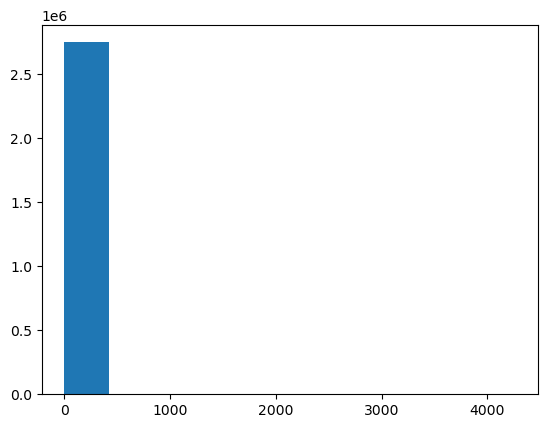

In [45]:
# checking the outlier using histogram and boxplot
plt.hist(df['fare_amount'])

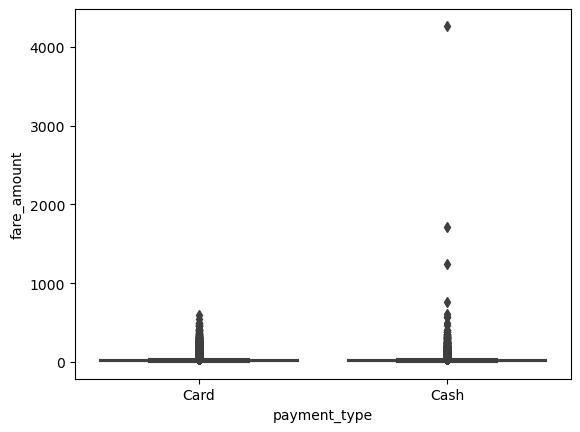

In [47]:
sns.boxplot(data=df, y="fare_amount", x="payment_type")
plt.show()

 From this Histogram  and Boxplot it is clearly seen that values goes till 4000 and its not visible so this are outliers in data.
 To Remove the outliers,there are two approach Z-score and IQR(Inter Quartile Range).Here we use IQR as per my decision the data is not properly normal distributed.

In [49]:
# Removing outliers using Interquartile range for numerical variables
for col in ['fare_amount','trip_distance','Duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    #Defining lower bound and upper bound for IQR
    lower_bound = q1 - 1.5*IQR                 # to manually calculate Q1 then, Q1 = 25/100 *(n+1) -------> n = total count of values
    upper_bound = q3 + 1.5*IQR                 #                                Q3 = 75/100 *(n+1)

    #Filtering the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amounts or trip distances?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods.

In [51]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


<function matplotlib.pyplot.show(close=None, block=None)>

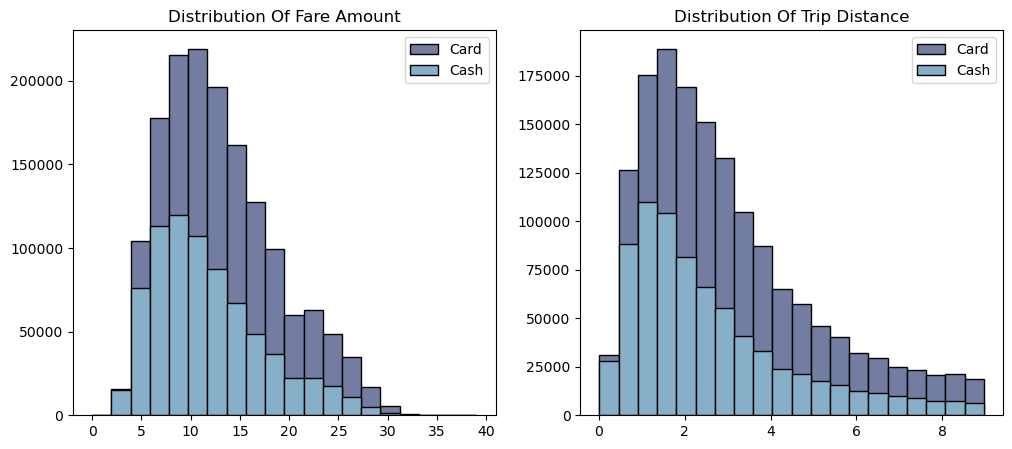

In [53]:
# Checking which type of payment_type is preffered by the customers according to trip_distance and fare_distance
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution Of Fare Amount")
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype = 'barstacked',bins=20, edgecolor='k', color = '#737CA1',label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype = 'barstacked',bins=20, edgecolor='k', color= '#87AFC7',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title("Distribution Of Trip Distance")
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype = 'barstacked',bins=20, edgecolor='k', color = '#737CA1',label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype = 'barstacked',bins=20, edgecolor='k', color= '#87AFC7',label = 'Cash')
plt.legend()
plt.show


In [55]:
# Calculating mean and standard deviation group by on payment type
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

Here according to the distribution and standard deviation we can say that as the fare amount and trip distance increases, customer prefers to use Card as payment type.

<function matplotlib.pyplot.show(close=None, block=None)>

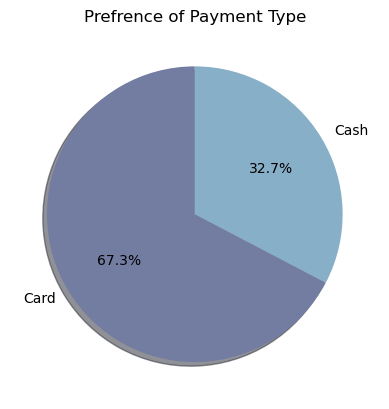

In [57]:
# Calculating what percetage of customers use Card and Cash

plt.title('Prefrence of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True),labels = df['payment_type'].value_counts().index,
        startangle = 90 ,shadow = True, autopct = '%1.1f%%',colors = ['#737CA1','#87AFC7'])
plt.show

 This Pie Chart Shows that 67% customers use CARD as a payment type and 37% use CASH payemnt type.

In [59]:
# calculating the total passenger count distribution based on the different payment type
passenger_count= df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename(columns={'passenger_count':'Count'},inplace = True)
passenger_count.reset_index(inplace=True)

In [61]:
# calculating the percentage of the each passenger count

passenger_count['percentage']=(passenger_count['Count']/passenger_count['Count'].sum())*100
passenger_count

,payment_type,passenger_count,Count,percentage
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [63]:
# For plotting the data in Stacked Bar Chart we have to tranfer data to new dataframe if we use this data as it is we can plot bar cahrt not stacked bar chart
# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)

t_data = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
t_data['payment_type']=['Card','Cash']
t_data.iloc[0,1:]= passenger_count.iloc[0:5,-1]
t_data.iloc[1,1:]= passenger_count.iloc[5:,-1]
t_data

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


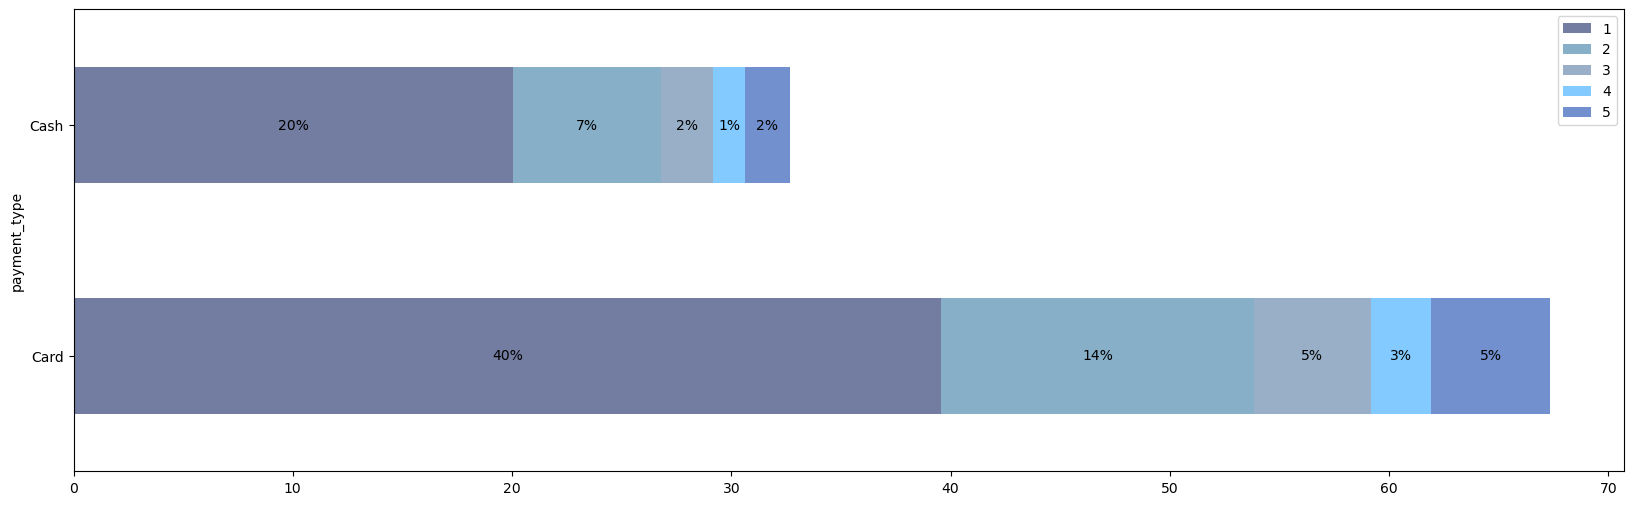

In [65]:
fig,ax = plt.subplots(figsize=(20,6))
t_data.plot(x='payment_type', kind = 'barh', stacked = True, ax=ax, color=['#737CA1','#87AFC7','#98AFC7','#82CAFF','#728FCE'])

# To add percentage text on stacked bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.text(x + width /2,
            y + height /2,
        '{:.0f}%'.format(width),
          horizontalalignment='center',
        verticalalignment ='center')

# Hypothesis Testing

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

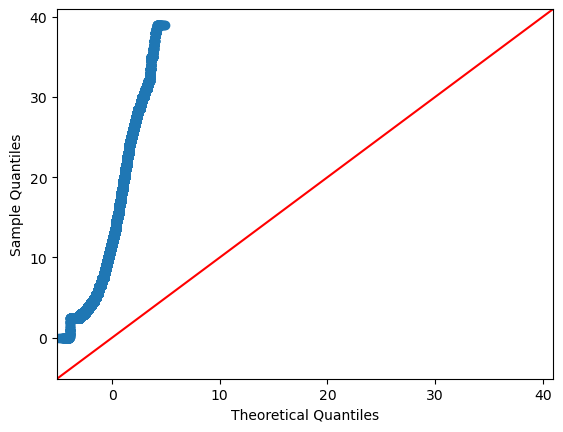

In [67]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df['fare_amount'], line='45')
plt.show()

The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. 
So, z distribution will not be good for this. That's why we will use T test.

T-test can be applied to both small and large samples and does not require the population standard deviation, 
it is a more universally applicable approach for hypothesis testing.

In the analysis of NYC Yellow Taxi Trip Records, where you're likely dealing with an unknown population standard deviation 
and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

**Null hypothesis**: There is no difference in average fare between customers who use credit cards and customers who use cash. 

**Alternative hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use cash

In [87]:
# For sample 1
card = df[df['payment_type']=='Card']['fare_amount']

# for sample 2
cash = df[df['payment_type']=='Cash']['fare_amount']

# Performing the T-test on both of the sample 
t_stat, p_value = st.ttest_ind(a=card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 169.2111527245052, P-value: 0.0


In [85]:
# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject Null hypothesis")
else:
    print("\nAccept Null hypothesis")


Reject the null hypothesis


Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.